# Assignment 3

## 1A. Factor Premiums and Factor Decay

In [78]:
import pandas as pd
import numpy as np

# Read the monthly data CSV into a DataFrame and print the first and last few rows
df_factors = pd.read_csv('F-F_Research_Data_Factors.CSV', skiprows=4, nrows=1178, header=None, names=['Date', 'Mkt-RF', 'SMB', 'HML', 'RF'])

# Display the head and tail of the DataFrame
print(df_factors.head())
print(df_factors.tail())

     Date  Mkt-RF   SMB   HML    RF
0  192607    2.96 -2.56 -2.43  0.22
1  192608    2.64 -1.17  3.82  0.25
2  192609    0.36 -1.40  0.13  0.23
3  192610   -3.24 -0.09  0.70  0.32
4  192611    2.53 -0.10 -0.51  0.31
        Date  Mkt-RF   SMB   HML    RF
1173  202404   -4.67 -2.39 -0.52  0.47
1174  202405    4.34  0.78 -1.66  0.44
1175  202406    2.77 -3.06 -3.31  0.41
1176  202407    1.24  6.80  5.73  0.45
1177  202408    1.61 -3.55 -1.12  0.48


In [79]:
# Change the Date column to a datetime object and set it as the index
df_factors["Date"] = pd.to_datetime(df_factors["Date"], format='%Y%m')
df_factors.set_index("Date", inplace=True)

# Add a column for the market returns
df_factors['Mkt'] = df_factors['Mkt-RF'] + df_factors['RF']

# Print the first few rows of the modified DataFrame
df_factors.head()

,Mkt-RF,SMB,HML,RF,Mkt
Date,,,,,
1926-07-01,2.96,-2.56,-2.43,0.22,3.18
1926-08-01,2.64,-1.17,3.82,0.25,2.89
1926-09-01,0.36,-1.40,0.13,0.23,0.59
1926-10-01,-3.24,-0.09,0.70,0.32,-2.92
1926-11-01,2.53,-0.10,-0.51,0.31,2.84


In [80]:
# Filter the dataframe for the two time periods
df_1927_1992 = df_factors.loc['1927-01':'1992-12']
df_1993_2023 = df_factors.loc['1993-01':'2023-12']

factors = ['Mkt', 'SMB', 'Mkt-RF']

def t_stat(df, factors):
    t_stats_am = {}
    t_stats_gm = {}
    len_df = len(df)
    # t_stat = (mean - population_mean) / (std / sqrt(n))
    for factor in factors:
        # Calculate the t_stats from mean ( how to calculate populated mean ?) and standard deviation
        temp = df[factor]/100
        std_df = np.std(temp)
        se = std_df/np.sqrt(len_df)
        # https://www.investopedia.com/ask/answers/06/geometricmean.asp
        t_stats_am[factor] = np.mean(temp)/se
        t_stats_gm[factor] = (np.prod(1 + temp)**(1/len_df) - 1)/se
    return t_stats_am, t_stats_gm

# Calculate the t-statistic
t_stat_1927_1992_am, t_stat_1927_1992_gm = t_stat(df_1927_1992, factors)
t_stat_1993_2023_am, t_stat_1993_2023_gm = t_stat(df_1993_2023, factors)

print("T-Stats for 1927-1992")
print('\nWith Arithmetic Mean')
for key, value in t_stat_1927_1992_am.items():
    print(f'{key}: {value}')
    
print('\nWith Geometric Mean')
for key, value in t_stat_1927_1992_gm.items():
    print(f'{key}: {value}')
    
print("\nT-Stats for 1993-2023")
print('\nWith Arithmetic Mean')
for key, value in t_stat_1993_2023_am.items():
    print(f'{key}: {value}')

print('\nWith Geometric Mean')
for key, value in t_stat_1993_2023_gm.items():
    print(f'{key}: {value}')
    
# https://www.investopedia.com/ask/answers/06/geometricmean.asp
print('\n Geometric mean is preferred over arithmetic mean as the data is correlated. \n')
    
    
print("The t-statistic for the 1927-1992 period is higher than the 1993-2023 period for all factors. This indicates that the 1927-1992 period had a higher level of significance in the factors than the 1993-2023 period.")

T-Stats for 1927-1992

With Arithmetic Mean
Mkt: 4.726132030772343
SMB: 2.1271515550073685
Mkt-RF: 3.2205625120989674

With Geometric Mean
Mkt: 3.926331796022473
SMB: 1.6993284993005768
Mkt-RF: 2.417559767205432

T-Stats for 1993-2023

With Arithmetic Mean
Mkt: 3.9249363455201687
SMB: 0.5355493777235056
Mkt-RF: 3.09945603152893

With Geometric Mean
Mkt: 3.4898392344986062
SMB: 0.23145185441694066
Mkt-RF: 2.6632732610065117

 Geometric mean is preferred over arithmetic mean as the data is correlated. 

The t-statistic for the 1927-1992 period is higher than the 1993-2023 period for all factors. This indicates that the 1927-1992 period had a higher level of significance in the factors than the 1993-2023 period.


In [81]:
# Read the monthly data CSV into a DataFrame and print the first few rows
df_returns_beta = pd.read_csv('Portfolios_Formed_on_BETA.csv', skiprows=16, nrows=734, header=None, names=['Date', 'Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20', 'Lo 10', 'Dec 2', 'Dec 3', 'Dec 4','Dec 5', 'Dec 6', 'Dec 7', 'Dec 8','Dec 9','Hi 10'])

df_returns_beta.head()

,Date,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
0,196307,1.14,-0.10,-0.93,-0.91,-1.46,1.36,0.75,0.08,-0.28,-0.59,-1.22,-0.42,-1.35,-2.06,-0.77
1,196308,3.66,4.77,6.34,6.38,9.72,3.52,3.90,4.29,5.26,5.20,7.34,7.94,4.96,9.06,10.47
2,196309,-2.78,-0.76,-0.71,-0.92,-2.74,-3.10,-2.24,-0.54,-0.98,-1.33,-0.17,-0.81,-1.02,-1.91,-3.68
3,196310,0.74,3.57,2.08,5.75,3.05,1.24,-0.13,2.00,5.13,2.35,1.86,6.80,4.76,3.09,3.01
4,196311,-0.63,-0.24,-0.91,-0.83,0.18,-0.91,-0.15,1.60,-2.03,-1.00,-0.84,-1.14,-0.54,-0.12,0.52


In [82]:
# Change the Date column to a datetime object and set it as the index
df_returns_beta["Date"] = pd.to_datetime(df_returns_beta["Date"], format='%Y%m')
df_returns_beta.set_index("Date", inplace=True)

df_returns_beta = df_returns_beta.loc[:, ['Lo 10', 'Hi 10']]
df_beta_momentum = df_returns_beta['Hi 10'] - df_returns_beta['Lo 10']

df_beta_momentum.head()


Date
1963-07-01   -2.13
1963-08-01    6.95
1963-09-01   -0.58
1963-10-01    1.77
1963-11-01    1.43
dtype: float64

In [83]:
df_momentum = pd.read_csv('F-F_Momentum_Factor.CSV', skiprows=14, nrows=1172, header=None, names=['Date', 'Momentum'])
df_momentum["Date"] = pd.to_datetime(df_momentum["Date"], format='%Y%m')
df_momentum.set_index("Date", inplace=True)


## 1B. Factor Index Construction in Practice

Q1. The Investable universe for the MSCI index consists of all the existing constituents of an underlying MSCI parent index. This ensures that the investable universe has sufficient liquidity and capacity by depending on broader MSCI country or regional Index. (Section 2.1)

Q2. Price momentum in the MSCI momentum index is calculated using 6 months and 12 months local price performance of each security. 
### Price Momentum Calculations

- **6-month Price Momentum**:  
  \[
  \left(\frac{P_{T-1}}{P_{T-7}} - 1\right) - \text{(Local Risk-free Rate)}
  \]

- **12-month Price Momentum**:  
  \[
  \left(\frac{P_{T-1}}{P_{T-13}} - 1\right) - \text{(Local Risk-free Rate)}
  \]

where:
- \( P_{T-1} \) = Security local price one month prior to the rebalancing date (T).
- \( P_{T-7} \) = Security local price seven months prior to the rebalancing date (T).
- \( P_{T-13} \) = Security local price thirteen months prior to the rebalancing date (T).

If 12 month price momentum is missing, only 6 month  price momentum is used for computing momentum value and vice versa if 6 months is missing. Local risk free rates are the short-term rates in local currency of the country, typically the 3M LIBOR rate or short-term deposit rate. (Section 2.2)

Q3. Price momentum is standardized across stocks by calculating a risk adjusted momentum value for each security, Which is converted to Z-Score. Risk adjusted momentum is calculated by dividing price momentum by its annualized standard deviation of weekly returns over 3 years. This normalizes the impact of volatility across stocks. These are standardized into Z-Scores and then averaged out using 6 months and 12 months to produce single combined momentum z-score. 

To control the extreme values the momentum z-score is winsorized at +/-3. The values beyond 3 or below -3 are capped at the respective values.

Q4. Selected stocks are weighted by finding out weight calculation (Each stock weight in the index is product of its market cap weight in parent index and its momentum score) then the momentum weight is normalized to 100%.

### Benifits
1. By including market cap, the index emphasizes larger, more liquid stocks. This reduces impact of individual trade on stock prices.
2. Weight of marketcap also reduces the volatility of the index. 

### Detriments
1. Lower weight will be given to the high momentum stocks that have smaller market cap. This could dilute momentum factor.

Q5.

## 2A. Data cleaning and validation

In [84]:
df_stocks_date = pd.read_excel('data_ml.xlsx' , usecols=['stock_id', 'date','Pb', 'R1M_Usd', 'R3M_Usd', 'R6M_Usd', 'R12M_Usd', 'Bv', 'Mkt_Cap_3M_Usd'], parse_dates=['date'])       # Load the data

date_counts = df_stocks_date['date'].value_counts()


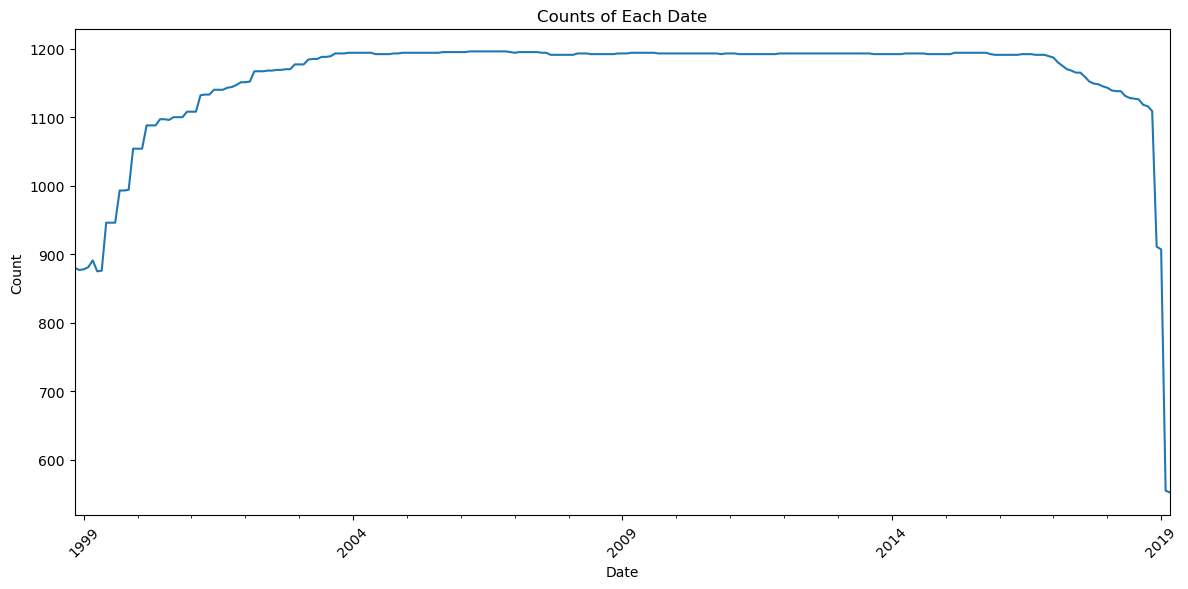

The counts of each date are not uniform. This indicates that the data is not evenly distributed across the dates.
date
1998-11-30    880
1998-12-31    877
1999-01-31    878
1999-02-28    881
1999-03-31    891
Name: count, dtype: int64
date
2018-11-30    1109
2018-12-31     911
2019-01-31     907
2019-02-28     555
2019-03-31     552
Name: count, dtype: int64
Month of 2019 March has the lowest count, which is returns of 2019 April.


In [85]:
import matplotlib.pyplot as plt

date_counts = date_counts.sort_index()

# Plot the counts
plt.figure(figsize=(12, 6))
date_counts.plot()
plt.title('Counts of Each Date')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("The counts of each date are not uniform. This indicates that the data is not evenly distributed across the dates.")
print(date_counts.head())
print(date_counts.tail())
print("Month of 2019 March has the lowest count, which is returns of 2019 April.")

count    283380.000000
mean          0.012633
std           0.177877
min          -0.922000
25%          -0.044000
50%           0.011000
75%           0.064000
max          30.176000
Name: R1M_Usd, dtype: float64


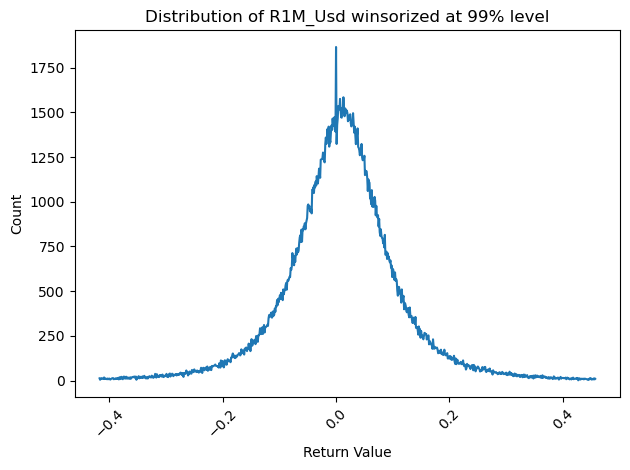

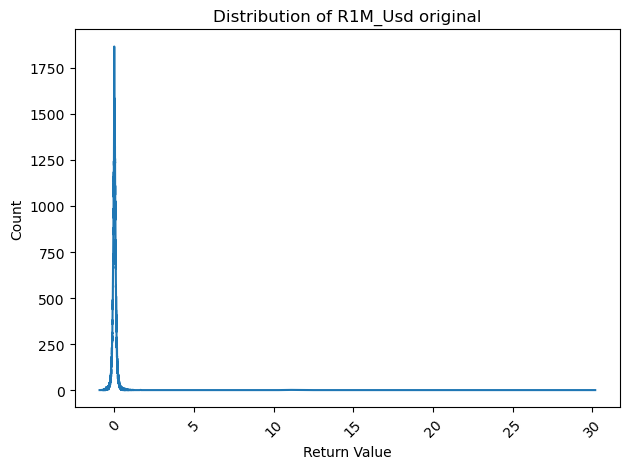

The outliers are at the higher end with maximum being 30.176 for R1M_Usd.


In [86]:
from scipy.stats.mstats import winsorize

# Calculate basic statistics
basic_stats = df_stocks_date['R1M_Usd'].describe()

# Display the basic statistics
print(basic_stats)

# Winsorize the counts
R1M_values_winsorized = winsorize(df_stocks_date['R1M_Usd'], limits=[0.005, 0.005]).compressed()

# Identify the limits used for winsorization
lower_limit = np.min(R1M_values_winsorized)
upper_limit = np.max(R1M_values_winsorized)

# Filter out the values that are at these limits
R1M_values_filtered = df_stocks_date['R1M_Usd'][(df_stocks_date['R1M_Usd'] > lower_limit) & (df_stocks_date['R1M_Usd'] < upper_limit)]

R1M_counts = R1M_values_filtered.value_counts().sort_index()

R1M_counts_original = df_stocks_date['R1M_Usd'].value_counts().sort_index()

plt.figure()
R1M_counts.plot()
plt.title('Distribution of R1M_Usd winsorized at 99% level')
plt.xlabel('Return Value')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure()
R1M_counts_original.plot()
plt.title('Distribution of R1M_Usd original')
plt.xlabel('Return Value')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("The outliers are at the higher end with maximum being 30.176 for R1M_Usd.")

count    283380.000000
mean          0.036206
std           0.331932
min          -0.929000
25%          -0.066000
50%           0.027000
75%           0.122000
max          39.389000
Name: R3M_Usd, dtype: float64


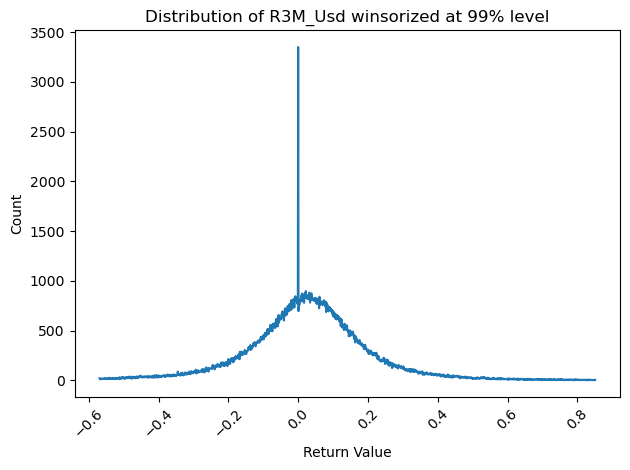

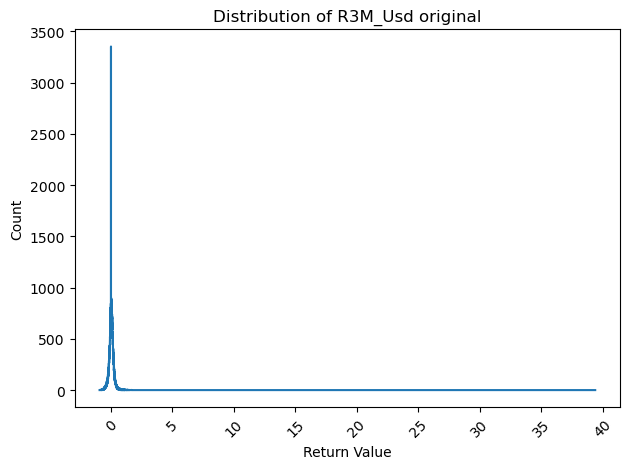

The outliers are at the higher end with maximum being 39.389 for R3M_Usd.


In [87]:
# Calculate basic statistics
basic_stats = df_stocks_date['R3M_Usd'].describe()

# Display the basic statistics
print(basic_stats)

# Winsorize the counts
R3M_values_winsorized = winsorize(df_stocks_date['R3M_Usd'], limits=[0.005, 0.005])

# Identify the limits used for winsorization
lower_limit = np.min(R3M_values_winsorized)
upper_limit = np.max(R3M_values_winsorized)

# Filter out the values that are at these limits
R3M_values_filtered = df_stocks_date['R3M_Usd'][(df_stocks_date['R3M_Usd'] > lower_limit) & (df_stocks_date['R3M_Usd'] < upper_limit)]

R3M_counts = R3M_values_filtered.value_counts().sort_index()

R3M_counts_original = df_stocks_date['R3M_Usd'].value_counts().sort_index()


plt.figure()
R3M_counts.plot()
plt.title('Distribution of R3M_Usd winsorized at 99% level')
plt.xlabel('Return Value')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure()
R3M_counts_original.plot()
plt.title('Distribution of R3M_Usd original')
plt.xlabel('Return Value')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("The outliers are at the higher end with maximum being 39.389 for R3M_Usd.")

count    283380.000000
mean          0.071358
std           0.531054
min          -0.980000
25%          -0.083000
50%           0.045000
75%           0.183000
max         106.929000
Name: R6M_Usd, dtype: float64


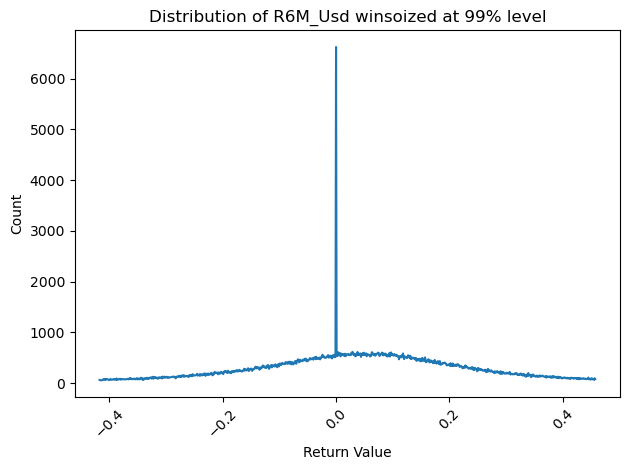

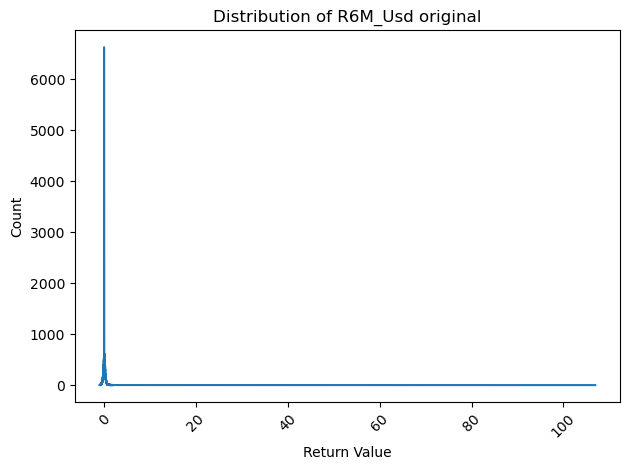

The outliers are at the higher end with maximum being 106.929 for R6M_Usd.


In [88]:
# Calculate basic statistics
basic_stats = df_stocks_date['R6M_Usd'].describe()

# Display the basic statistics
print(basic_stats)

# Winsorize the return values
R6M_values_winsorized = winsorize(df_stocks_date['R6M_Usd'], limits=[0.005, 0.005])

# Identify the limits used for winsorization
lower_limit = np.min(R1M_values_winsorized)
upper_limit = np.max(R1M_values_winsorized)

# Filter out the values that are at these limits
R6M_values_filtered = df_stocks_date['R6M_Usd'][(df_stocks_date['R6M_Usd'] > lower_limit) & (df_stocks_date['R6M_Usd'] < upper_limit)]

R6M_counts = R6M_values_filtered.value_counts().sort_index()

R6M_counts_original = df_stocks_date['R6M_Usd'].value_counts().sort_index()


plt.figure()
R6M_counts.plot()
plt.title('Distribution of R6M_Usd winsoized at 99% level')
plt.xlabel('Return Value')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure()
R6M_counts_original.plot()
plt.title('Distribution of R6M_Usd original')
plt.xlabel('Return Value')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("The outliers are at the higher end with maximum being 106.929 for R6M_Usd.")

count    283380.000000
mean          0.135854
std           0.765346
min          -0.991000
25%          -0.098000
50%           0.073000
75%           0.281000
max          95.972000
Name: R12M_Usd, dtype: float64


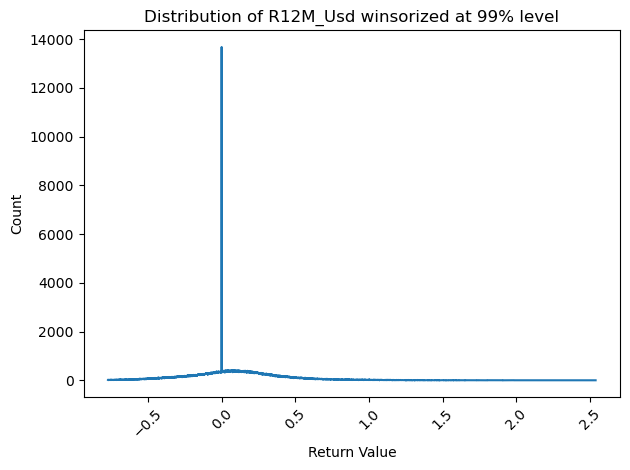

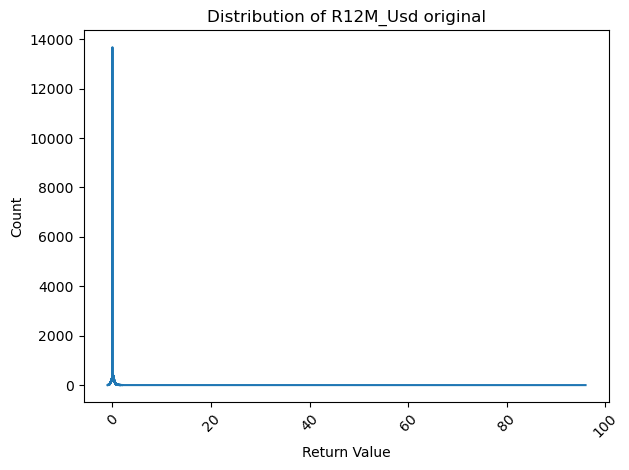

The outliers are at the higher end with maximum being 95.972 for R12M_Usd.


In [89]:
# Calculate basic statistics
basic_stats = df_stocks_date['R12M_Usd'].describe()

# Display the basic statistics
print(basic_stats)


# Winsorize the counts
R12M_values_winsorized = winsorize(df_stocks_date['R12M_Usd'], limits=[0.005, 0.005])

# Identify the limits used for winsorization
lower_limit = np.min(R12M_values_winsorized)
upper_limit = np.max(R12M_values_winsorized)

# Filter out the values that are at these limits
R12M_values_filtered = df_stocks_date['R12M_Usd'][(df_stocks_date['R12M_Usd'] > lower_limit) & (df_stocks_date['R12M_Usd'] < upper_limit)]

R12M_counts = R12M_values_filtered.value_counts().sort_index()

R12M_counts_original = df_stocks_date['R12M_Usd'].value_counts().sort_index()


plt.figure()
R12M_counts.plot()
plt.title('Distribution of R12M_Usd winsorized at 99% level')
plt.xlabel('Return Value')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure()
R12M_counts_original.plot()
plt.title('Distribution of R12M_Usd original')
plt.xlabel('Return Value')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("The outliers are at the higher end with maximum being 95.972 for R12M_Usd.")

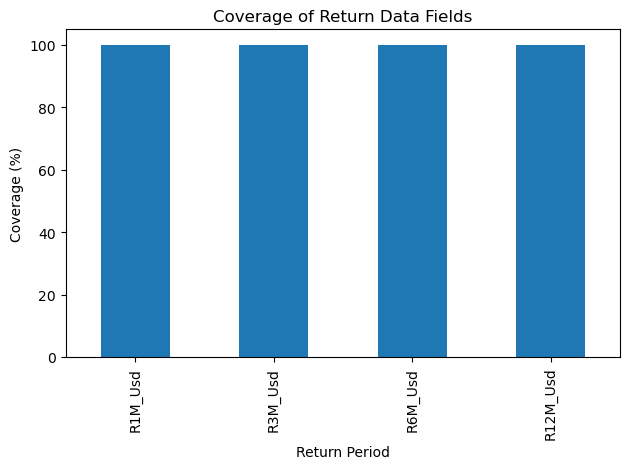

Stocks with missing return data in any period: []

To treat stocks with missing return data in any period, you have several options:
1. **Remove stocks with missing data**: This is the simplest approach but may reduce the sample size.
2. **Replace missing values**: Replace missing value with the mean, median, or past value of the stock.
3. **Use models that handle missing data**: Some machine learning models can handle missing data directly.

The choice of strategy depends on the extent of missing data and the impact on your analysis. Removing stocks with missing data is straightforward but may lead to biased results if the missing data is not random. Imputation can help retain more data but requires careful consideration of the imputation method to avoid introducing bias.



In [90]:
# Calculate the percentage of non-missing values for each return data field
coverage = df_stocks_date[['R1M_Usd', 'R3M_Usd', 'R6M_Usd', 'R12M_Usd']].notna().mean() * 100

# Plot the coverage for each period
plt.figure()
coverage.plot(kind='bar')
plt.title('Coverage of Return Data Fields')
plt.xlabel('Return Period')
plt.ylabel('Coverage (%)')
plt.tight_layout()
plt.show()

# Identify stocks with missing return data in any period
missing_data = df_stocks_date[['stock_id', 'R1M_Usd', 'R3M_Usd', 'R6M_Usd', 'R12M_Usd']].isna().any(axis=1)
stocks_with_missing_data = df_stocks_date.loc[missing_data, 'stock_id'].unique()

print(f"Stocks with missing return data in any period: {stocks_with_missing_data}")

# Discuss how to treat these stocks in your analysis
treatment_strategy = """
To treat stocks with missing return data in any period, you have several options:
1. **Remove stocks with missing data**: This is the simplest approach but may reduce the sample size.
2. **Replace missing values**: Replace missing value with the mean, median, or past value of the stock.
3. **Use models that handle missing data**: Some machine learning models can handle missing data directly.

The choice of strategy depends on the extent of missing data and the impact on your analysis. Removing stocks with missing data is straightforward but may lead to biased results if the missing data is not random. Imputation can help retain more data but requires careful consideration of the imputation method to avoid introducing bias.
"""

print(treatment_strategy)


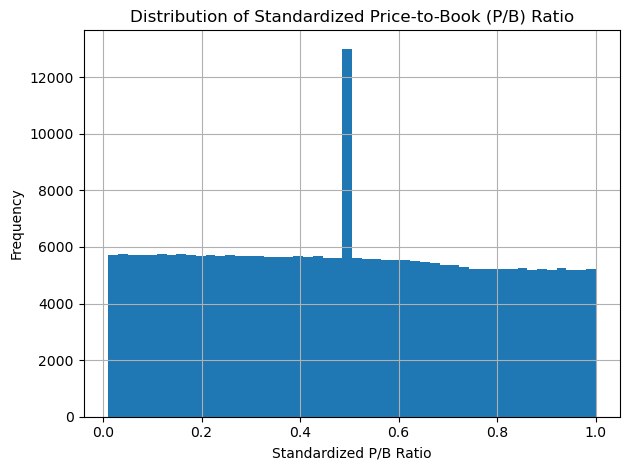

Standout P/B values: 84        1.00
85        1.00
86        1.00
663       1.00
664       1.00
          ... 
281677    0.97
281678    0.97
282299    1.00
282300    1.00
282301    1.00
Name: Pb, Length: 12995, dtype: float64

The Fama-French HML (High Minus Low) value factor is constructed by sorting stocks into portfolios based on their book-to-market (B/M) ratios. 
Stocks with high B/M ratios (low P/B ratios) are considered value stocks, while those with low B/M ratios (high P/B ratios) are considered growth stocks.

If there are standout values in the standardized P/B field, it may indicate extreme cases of overvaluation or undervaluation. 
In constructing value portfolios, you might consider excluding these extreme values to avoid potential outliers that could skew the results.

Alternatively, you could investigate these standout values further to understand the underlying reasons for their extremity and decide whether to include or exclude them based on your findings.

Correlatio

In [ ]:
plt.figure()
df_stocks_date['Pb'].hist(bins=50)
plt.title('Distribution of Standardized Price-to-Book (P/B) Ratio')
plt.xlabel('Standardized P/B Ratio')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Identify any standout values
standout_values = df_stocks_date['Pb'][df_stocks_date['Pb'] > 0.95]  # Example threshold for standout values
print(f"Standout P/B values: {standout_values}")

# Discuss implications based on Fama-French HML value factor
implications = """
The Fama-French HML (High Minus Low) value factor is constructed by sorting stocks into portfolios based on their book-to-market (B/M) ratios. 
Stocks with high B/M ratios (low P/B ratios) are considered value stocks, while those with low B/M ratios (high P/B ratios) are considered growth stocks.

If there are standout values in the standardized P/B field, it may indicate extreme cases of overvaluation or undervaluation. 
In constructing value portfolios, you might consider excluding these extreme values to avoid potential outliers that could skew the results.

Alternatively, you could investigate these standout values further to understand the underlying reasons for their extremity and decide whether to include or exclude them based on your findings.
"""

print(implications)

# Perform a sanity check to ensure the P/B value is indeed the ratio between market cap and book value
# Since the fields are standardized, we can check the correlation between the standardized P/B ratio and the ratio of standardized market cap to standardized book value
df_stocks_date['Mkt_Cap_to_Bv'] = (df_stocks_date['Mkt_Cap_3M_Usd'] / df_stocks_date['Bv'])
correlation = df_stocks_date[['Pb', 'Mkt_Cap_to_Bv']].corr().iloc[0, 1]

print(f"Correlation between standardized P/B and Market Cap to Book Value ratio: {correlation}")

sanity_check = """
A high correlation between the standardized P/B ratio and the ratio of standardized market cap to standardized book value would indicate that the P/B value is indeed the ratio between market cap and book value.
If the correlation is low, it may suggest inconsistencies in the data or the need for further investigation.
"""

print(sanity_check)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


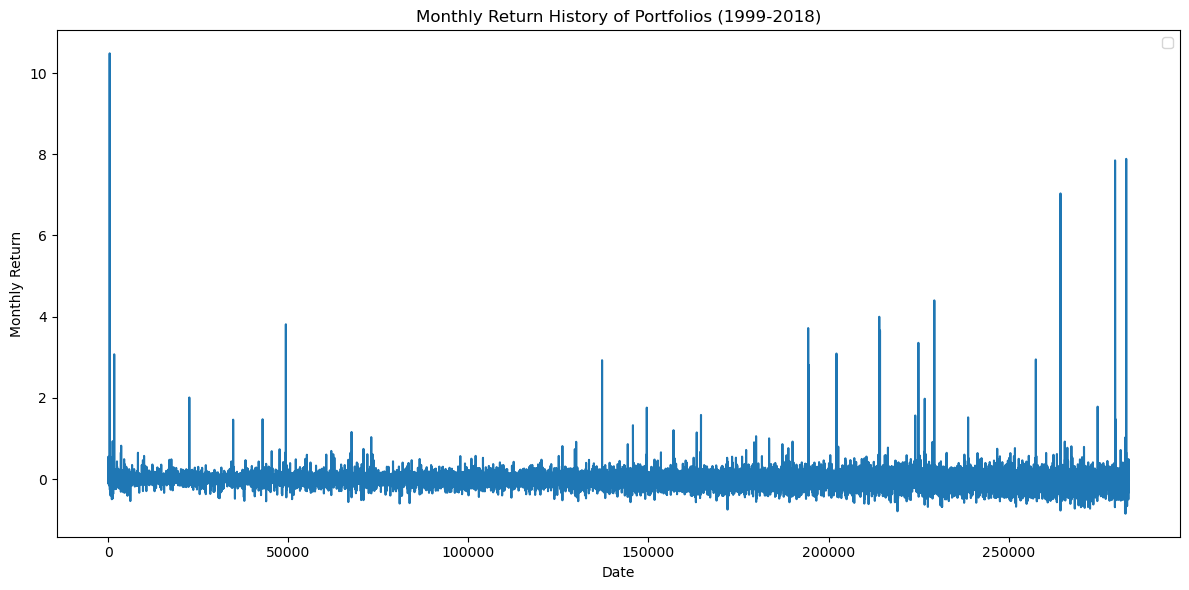

In [98]:

# Filter the data to include only dates from December 1998 to November 2018
start_date = '1998-12-01'
end_date = '2018-11-30'
df_stocks_date_period = df_stocks_date[(df_stocks_date['date'] >= start_date) & (df_stocks_date['date'] <= end_date)]

# Calculate the weighted return for each stock in each period
df_stocks_date['Weighted_Return'] = df_stocks_date['R1M_Usd'] * df_stocks_date['Mkt_Cap_3M_Usd']

# Plot the weighted returns for both portfolios
plt.figure(figsize=(12, 6))
plt.plot(df_stocks_date['Weighted_Return'])
plt.title('Monthly Return History of Portfolios (1999-2018)')
plt.xlabel('Date')
plt.ylabel('Monthly Return')
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
# Compare with the MSCII retun and comment on how you might gain confidence that the stock-level data you have been provided cover a broad universe of US stocks and the return data are accurate.Corelation.